E:\Anaconda\envs\py2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


slope: [[ 5.07793064]]
r2 score: 0.878262470366


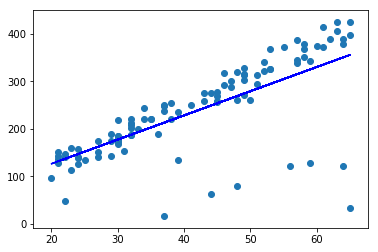

In [1]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like

from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(ages_train,net_worths_train)
print 'slope:',reg.coef_
print 'r2 score:',reg.score(ages_test,net_worths_test)




try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()



In [20]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    residual_error=net_worths-predictions
    residual_error_abs=map(abs,residual_error)
    data_zip=zip(ages,net_worths,residual_error_abs)
    data_sort=sorted(data_zip,key=lambda x: x[2],reverse=False)
    print data_sort   
    
    cleaned_data=data_sort[0.1*len(predictions):]
    
        
    ### your code goes here

    
    return cleaned_data

predictions = reg.predict(ages_train)

outlierCleaner(predictions, ages_train, net_worths_train)

[(array([30]), array([ 177.46485913]), array([ 0.08308172])), (array([32]), array([ 187.09760491]), array([ 0.60619723])), (array([29]), array([ 173.54835439]), array([ 1.07834419])), (array([32]), array([ 186.46155999]), array([ 1.24224214])), (array([49]), array([ 271.75164335]), array([ 2.27697972])), (array([45]), array([ 256.833127]), array([ 3.1162265])), (array([38]), array([ 221.33012794]), array([ 3.15874195])), (array([21]), array([ 128.48471398]), array([ 3.36185108])), (array([22]), array([ 140.92736562]), array([ 4.00286992])), (array([21]), array([ 136.08924543]), array([ 4.24268037])), (array([45]), array([ 259.12330052]), array([ 5.40640002])), (array([24]), array([ 140.78722458]), array([ 6.29313241])), (array([33]), array([ 200.22792609]), array([ 7.44619331])), (array([30]), array([ 185.18703435]), array([ 7.6390935])), (array([24]), array([ 139.40479592]), array([ 7.67556106])), (array([48]), array([ 260.80659752]), array([ 8.14409491])), (array([30]), array([ 186.0

TypeError: slice indices must be integers or None or have an __index__ method

In [3]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )

ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
print ages

[[49]
 [21]
 [32]
 [30]
 [53]
 [51]
 [61]
 [23]
 [39]
 [21]
 [30]
 [43]
 [21]
 [29]
 [49]
 [45]
 [30]
 [47]
 [57]
 [20]
 [57]
 [52]
 [35]
 [27]
 [64]
 [35]
 [24]
 [24]
 [58]
 [47]
 [57]
 [53]
 [44]
 [64]
 [37]
 [45]
 [58]
 [48]
 [59]
 [46]
 [52]
 [22]
 [30]
 [33]
 [23]
 [30]
 [24]
 [32]
 [49]
 [36]
 [37]
 [29]
 [32]
 [63]
 [49]
 [48]
 [27]
 [53]
 [27]
 [37]
 [65]
 [49]
 [45]
 [51]
 [58]
 [55]
 [30]
 [21]
 [34]
 [32]
 [29]
 [63]
 [60]
 [34]
 [50]
 [38]
 [62]
 [41]
 [32]
 [31]
 [45]
 [32]
 [46]
 [61]
 [38]
 [30]
 [65]
 [43]
 [24]
 [22]
 [25]
 [48]
 [56]
 [39]
 [22]
 [37]
 [65]
 [44]
 [64]
 [59]]


[[  3.65788000e+05   6.00000000e+05]
 [  2.67102000e+05   1.20000000e+06]
 [  1.70941000e+05   3.50000000e+05]
 [  2.43293000e+05   1.50000000e+06]
 [  2.67093000e+05   3.25000000e+05]
 [  3.70448000e+05   2.60000000e+06]
 [  1.97091000e+05   4.00000000e+05]
 [  1.30724000e+05   0.00000000e+00]
 [  2.88589000e+05   7.88750000e+05]
 [  2.48546000e+05   8.50000000e+05]
 [  2.57486000e+05   7.00000000e+05]
 [  2.88542000e+05   1.20000000e+06]
 [  2.51654000e+05   1.10000000e+06]
 [  2.88558000e+05   2.50000000e+05]
 [  6.37440000e+04   0.00000000e+00]
 [  3.57091000e+05   8.50000000e+05]
 [  2.71442000e+05   3.10000000e+06]
 [  3.04110000e+05   2.00000000e+06]
 [  1.87922000e+05   2.50000000e+05]
 [  2.13625000e+05   1.00000000e+06]
 [  2.49201000e+05   7.00000000e+05]
 [  2.31330000e+05   7.00000000e+05]
 [  1.82245000e+05   2.00000000e+05]
 [  2.11788000e+05   1.70000000e+06]
 [  2.24305000e+05   8.00000000e+05]
 [  2.73746000e+05   1.00000000e+06]
 [  3.39288000e+05   8.00000000e+06]
 

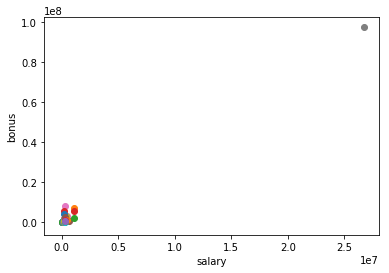

In [42]:
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
import numpy

### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

data=np.array(data)
print data
       

### your code below

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
#matplotlib.pyplot.axis([0 ,2, 0, 2])
matplotlib.pyplot.show()